In [154]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [155]:
df = pd.read_csv('ecommerce_data.csv')
df.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2


In [156]:
scaler = StandardScaler()
df.n_products_viewed = scaler.fit_transform(df.n_products_viewed.reshape(-1,1))
df.visit_duration = scaler.fit_transform(df.visit_duration.reshape(-1,1))
temp = df.values

C:\Users\parmeets\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
C:\Users\parmeets\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


In [157]:
X = temp[:,:-1]
y = temp[:,-1]

In [158]:
enc = OneHotEncoder(sparse=False,categorical_features=[0,3,4])
encT = OneHotEncoder(sparse=False,categorical_features=[0])

In [159]:
X = enc.fit_transform(X)
y = y.reshape(-1,1)
y =  encT.fit_transform(y)

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [161]:
def sigmoid(X):
    return 1/(1+np.exp(-1*X))
def softmax(X):
    expX = np.exp(X)
    return expX/np.sum(expX,axis=1,keepdims=True)
def forward(X,W1,W2,b1,b2):
    Z = sigmoid(X.dot(W1) + b1)
    a2 = Z.dot(W2) + b2
    return softmax(a2),Z
def costFunc(T,Y):
    return np.mean(T*(np.log(Y)))

Train Costs: -0.390778833591 Prediction rate 0.367164179104
Test Costs: -0.343448516065 Prediction rate 0.466666666667
Train Costs: -0.388310405998 Prediction rate 0.373134328358
Test Costs: -0.341305430777 Prediction rate 0.466666666667
Train Costs: -0.385901593443 Prediction rate 0.373134328358
Test Costs: -0.33921965698 Prediction rate 0.466666666667
Train Costs: -0.383550710712 Prediction rate 0.379104477612
Test Costs: -0.33718949455 Prediction rate 0.460606060606
Train Costs: -0.381256111182 Prediction rate 0.379104477612
Test Costs: -0.335213284342 Prediction rate 0.466666666667
Train Costs: -0.379016187144 Prediction rate 0.379104477612
Test Costs: -0.333289408395 Prediction rate 0.466666666667
Train Costs: -0.376829369979 Prediction rate 0.382089552239
Test Costs: -0.33141629 Prediction rate 0.472727272727
Train Costs: -0.374694130222 Prediction rate 0.382089552239
Test Costs: -0.329592393638 Prediction rate 0.472727272727
Train Costs: -0.372608977492 Prediction rate 0.3850746

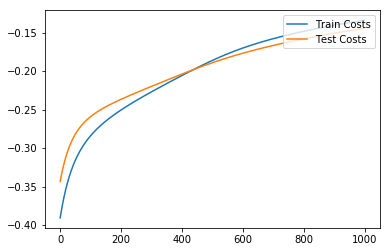

In [162]:
D = X_train.shape[1]
M = 3
K = y_train.shape[1]
N = X_train.shape[0]

W1 = np.random.randn(D,M)
W2 = np.random.randn(M,K)
b1 = np.zeros(M)
b2 = np.zeros(K)


learning_rate = 10e-7
test_costs = []
train_costs = []
for x in xrange(100000):
    Z,hidden = forward(X_train,W1,W2,b1,b2)
    Ztest,hidden2 = forward(X_test,W1,W2,b1,b2)
    
    if  x%100==0:
        cost = costFunc(y_train,Z)
        testcost = costFunc(y_test,Ztest)

        train_costs.append(cost)
        test_costs.append(testcost)

        Ztesttrue = np.argmax(y_test,axis=1)
        Ztest = np.argmax(Ztest,axis=1)

        Ztraintrue = np.argmax(y_train,axis=1)
        Ztrain = np.argmax(Z,axis=1)

        classification_rate = np.mean(Ztesttrue==Ztest)
        classification_rate_train = np.mean(Ztraintrue==Ztrain)
    
        print "Train Costs:",cost,"Prediction rate",classification_rate_train
        print "Test Costs:",testcost,"Prediction rate",classification_rate
    
    W2 += learning_rate*hidden.T.dot(y_train-Z)
    b2 += learning_rate*((y_train-Z).sum(axis=0)) 
    W1 += learning_rate*X_train.T.dot(((y_train-Z).dot(W2.T))*hidden*(1-hidden))
    b1 += learning_rate*learning_rate*(((y_train-Z).dot(W2.T))*hidden*(1-hidden)).sum(axis=0) 
    
plt.plot(train_costs,label="Train Costs")
plt.plot(test_costs,label="Test Costs")
plt.legend(loc='upper right')
plt.show()